In [2]:
from dasly.das_master import Dasly
import numpy as np
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
# Define the path to the YAML file
yaml_path = '../config.yml'

# Open and read the YAML file
with open(yaml_path, 'r') as file:
    params = yaml.safe_load(file)


# Access parameters from the YAML file
input_dir = params['input_dir']
start_exact_second = params['start_exact_second']
integrate = params['integrate']

database_type = params['database']['database_type']
dbapi = params['database']['dbapi']
endpoint = params['database']['endpoint']
port = params['database']['port']
database = params['database']['database']
database_table = params['database']['database_table']

hdf5_file_length = params['hdf5_file_length']
batch = params['dasly']['batch']
batch_gap = params['dasly']['batch_gap']

lowpass_filter_freq = params['lowpass_filter_freq']
decimate_t_rate = params['decimate_t_rate']

gaussian_smooth_s1 = params['gaussian_smooth']['s1']
gaussian_smooth_s2 = params['gaussian_smooth']['s2']
gaussian_smooth_std_s = params['gaussian_smooth']['std_s']

binary_threshold = params['binary_threshold']

hough_speed_res = params['hough_transform']['speed_res']
hough_length_meters = params['hough_transform']['length_meters']

dbscan_eps_seconds = params['dbscan_eps_seconds']

In [4]:
chIndex_all = np.arange(0, 800)
chIndex_remove1 = np.arange(0, 36)
chIndex_remove2 = np.arange(365, 387)
chIndex_remove3 = np.arange(751, 800)
chIndex_remove = np.concatenate((
    chIndex_remove1, chIndex_remove2, chIndex_remove3))
chIndex = np.setdiff1d(chIndex_all, chIndex_remove)


durations = [10, 20, 30, 40, 50, 60]
durations_run = []

for duration in durations:
    start_time = time.time()  # Record the start time


    das = Dasly()
    das.load_data(
        folder_path='/media/kptruong/yellow02/Aastfjordbrua/Aastfjordbrua/',
        start='20231005 082400',  # One car
        # start='20231005 085100',  # Noise
        duration=duration,
        integrate=False,
        chIndex=chIndex,
        start_exact_second=False
    )
    # forward Gaussian smoothing
    ###########################################################################
    das.lowpass_filter(cutoff=lowpass_filter_freq)
    das.decimate(t_rate=decimate_t_rate)
    das.gaussian_smooth(
        s1=80,
        s2=90,
        std_s=10)
    das.sobel_filter()
    das.binary_transform(threshold=2e-8)
    das.hough_transform(target_speed=85, speed_res=0.5, length_meters=500)

    das.reset()
    das.lowpass_filter(cutoff=lowpass_filter_freq)
    das.decimate(t_rate=decimate_t_rate)
    das.gaussian_smooth(
        s1=80,
        s2=90,
        std_s=10)
    das.sobel_filter()
    das.binary_transform(threshold=2e-8)
    das.hough_transform(target_speed=85, speed_res=0.5, length_meters=500)

    end_time = time.time()  # Record the end time
    # Calculate and print the execution time
    execution_time = end_time - start_time
    durations_run.append(execution_time)
    print(f"Execution time for duration {duration} seconds: {execution_time:.2f} seconds")

2 files, from 20231005 082354 to 20231005 082404
Signal updated with low-pass filter.
Signal updated with new temporal sampling rate 8.
Signal updated with Gaussian smoothing.
Signal updated with Sobel filter.
Signal updated with binary transform with threshold 2e-08.
0 lines are detected.
Signal updated with low-pass filter.
Signal updated with new temporal sampling rate 8.
Signal updated with Gaussian smoothing.
Signal updated with Sobel filter.
Signal updated with binary transform with threshold 2e-08.
0 lines are detected.


Execution time for duration 10 seconds: 2.11 seconds


3 files, from 20231005 082354 to 20231005 082414
Signal updated with low-pass filter.
Signal updated with new temporal sampling rate 8.
Signal updated with Gaussian smoothing.
Signal updated with Sobel filter.
Signal updated with binary transform with threshold 2e-08.
0 lines are detected.
Signal updated with low-pass filter.
Signal updated with new temporal sampling rate 8.
Signal updated with Gaussian smoothing.
Signal updated with Sobel filter.
Signal updated with binary transform with threshold 2e-08.
0 lines are detected.


Execution time for duration 20 seconds: 2.93 seconds


4 files, from 20231005 082354 to 20231005 082424
Signal updated with low-pass filter.
Signal updated with new temporal sampling rate 8.
Signal updated with Gaussian smoothing.
Signal updated with Sobel filter.
Signal updated with binary transform with threshold 2e-08.
2 lines are detected.
Signal updated with low-pass filter.
Signal updated with new temporal sampling rate 8.
Signal updated with Gaussian smoothing.
Signal updated with Sobel filter.
Signal updated with binary transform with threshold 2e-08.
2 lines are detected.


Execution time for duration 30 seconds: 3.46 seconds


5 files, from 20231005 082354 to 20231005 082434
Signal updated with low-pass filter.
Signal updated with new temporal sampling rate 8.
Signal updated with Gaussian smoothing.
Signal updated with Sobel filter.
Signal updated with binary transform with threshold 2e-08.
4 lines are detected.
Signal updated with low-pass filter.
Signal updated with new temporal sampling rate 8.
Signal updated with Gaussian smoothing.
Signal updated with Sobel filter.
Signal updated with binary transform with threshold 2e-08.
4 lines are detected.


Execution time for duration 40 seconds: 4.24 seconds


6 files, from 20231005 082354 to 20231005 082444
Signal updated with low-pass filter.
Signal updated with new temporal sampling rate 8.
Signal updated with Gaussian smoothing.
Signal updated with Sobel filter.
Signal updated with binary transform with threshold 2e-08.
4 lines are detected.
Signal updated with low-pass filter.
Signal updated with new temporal sampling rate 8.
Signal updated with Gaussian smoothing.
Signal updated with Sobel filter.
Signal updated with binary transform with threshold 2e-08.
4 lines are detected.


Execution time for duration 50 seconds: 4.79 seconds


7 files, from 20231005 082354 to 20231005 082454
Signal updated with low-pass filter.
Signal updated with new temporal sampling rate 8.
Signal updated with Gaussian smoothing.
Signal updated with Sobel filter.
Signal updated with binary transform with threshold 2e-08.
4 lines are detected.
Signal updated with low-pass filter.
Signal updated with new temporal sampling rate 8.
Signal updated with Gaussian smoothing.
Signal updated with Sobel filter.
Signal updated with binary transform with threshold 2e-08.
4 lines are detected.


Execution time for duration 60 seconds: 5.89 seconds


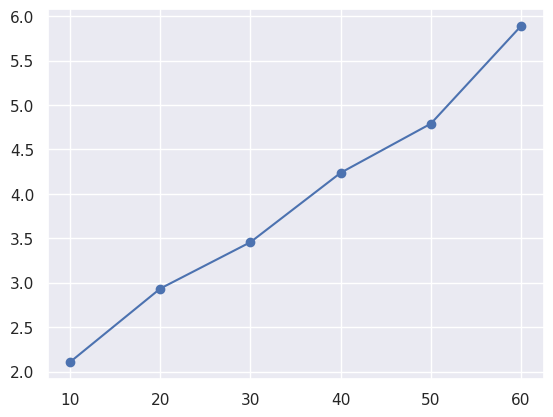

In [5]:
sns.set_theme()
plt.plot(durations, durations_run, marker='o', linestyle='-', color='b')
# plt.xlabel('Batch duration (seconds)')
# plt.ylabel('Execution time (seconds)')
# plt.title('Execution Time vs Batch Duration')